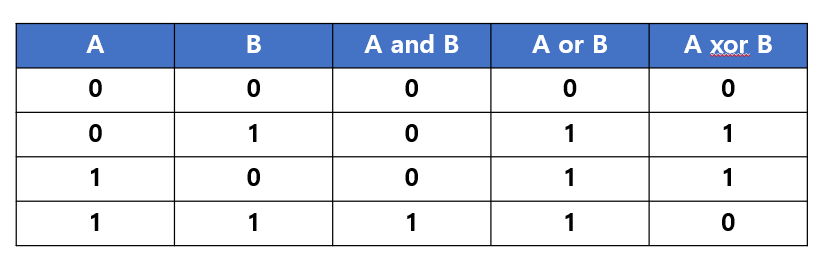

### 목표설정
-and,xor 결과 값을 머신러닝 모델을 통해 예측해보자
-scikitlearn 라이브러리를 사용해보면서 간단하게 알아보자


### 데이터 확보

In [1]:
import pandas as pd

In [2]:
#  and 게이트 데이터 프레임 만들기
and_dict = {
    'A' : [1, 0, 0, 0, 1, 0, 1, 0],
    'B' : [1, 1, 0, 1, 0, 1, 1, 0],
    'A and B' : [1, 0, 0, 0, 0, 0, 1, 0]
    
}

In [3]:
and_df = pd.DataFrame(and_dict)
and_df

,A,B,A and B
0,1,1,1
1,0,1,0
2,0,0,0
3,0,1,0
4,1,0,0
5,0,1,0
6,1,1,1
7,0,0,0


In [4]:
# 문제 데이터와 정답 데이터 분할 해주기
X = and_df.iloc[:,0:2]
y = and_df.iloc[:, 2]

In [5]:
#데이터의 값이나 형태가 변화했을때 곡 shape를 찍어 볼 것
X.shape, y.shape

((8, 2), (8,))

In [6]:
# 훈련 평가 셋으로 데이터 분할 
# 훈련 셋은 _train, 평가 셋_test
X_train = X.iloc[0:6,:]
X_test = X.iloc[6:8,:]
y_train = y[0:6]
y_test = y[6:8]

In [7]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((6, 2), (2, 2), (6,), (2,))

### 모델 사용해보기

In [8]:
# 가장 쉬운 모델인 최근접 이웃 알고리즘 사용(KNN 모델 -> 추후 설명 예정)
# 모델 import
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#모델 객체 생성 -> 변수에 담아서 편하게 쓰도록 만들어보자
knn_and = KNeighborsClassifier(n_neighbors=1)

In [10]:
# 모델 학습
# fit(훈련용 문제 데이터, 훈련용 정답 데이터) : 데이터를 핛흡시키는 함수
knn_and.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
# 모델예측
pre = knn_and.predict(X_test)

In [12]:
#모델 평가
from sklearn.metrics import accuracy_score # 정확도

In [13]:
accuracy_score(y_test, pre)

1.0

###  논리게이트 예측해보기

In [15]:
xor_dict = {
    'A' : [1, 0, 0, 0, 1, 0, 1, 0],
    'B' : [1, 1, 0, 0, 0, 1, 0, 0],
    'A xor B' : [0, 1, 0, 0, 1, 1, 1, 0]
    
}

In [16]:
# 데이터프레임 화
xor_df = pd.DataFrame(xor_dict)
xor_df

,A,B,A xor B
0,1,1,0
1,0,1,1
2,0,0,0
3,0,0,0
4,1,0,1
5,0,1,1
6,1,0,1
7,0,0,0


In [ ]:
# 아래의 코드는 순차적으로 진행되는 코드

In [17]:
# 문제와 정답분리
X = xor_df.iloc[:,:2]
y = xor_df.iloc[:,2]

In [18]:
X.shape, y.shape

((8, 2), (8,))

In [20]:
#훈련셋과 평가셋으로 데이터 분리
X_train = X.iloc[:6, :2]
X_test = X.iloc[6:, :]
y_train = y.iloc[:6]
y_test = y.iloc[6:]

In [21]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((6, 2), (2, 2), (6,), (2,))

In [23]:
# loc/iloc를 이용하면 한번에 4등분이 가능하다
X_train = xor_df.iloc[:6, 0:2]
X_test = xor_df.iloc[6:, 0:2]
y_train = xor_df.iloc[:6, 2]
y_test = xor_df.iloc[6:,2]

In [24]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((6, 2), (2, 2), (6,), (2,))

### 모델링

In [25]:
# 모델 객체 학습
knn_xor = KNeighborsClassifier(n_neighbors=1)

In [27]:
#모델학습
knn_xor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
#모델예측
pre = knn_xor.predict(X_test)
pre

array([1, 0], dtype=int64)

In [29]:
# 모델평가 - 평가지표 활용하기
accuracy_score(y_test, pre)

1.0

In [30]:
# 모델평가 - score 함수 이용하기
#score(X_test,y_test)
knn_xor.score(X_test, y_test)

1.0